In [ ]:
! pip install ultralytics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Colab/data/yolo-trafic.zip /content/
!mkdir -p /content/data
!unzip /content/yolo-trafic.zip -d /content/data/
!rm /content/yolo-trafic.zip

In [4]:
!ls /content/data

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [4]:
import ultralytics
from ultralytics import YOLO
import torch
ultralytics.checks()

Ultralytics YOLOv8.2.8 🚀 Python-3.10.14 torch-2.3.0 CPU (Apple M1 Pro)
Setup complete ✅ (10 CPUs, 16.0 GB RAM, 198.7/460.4 GB disk)


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

In [7]:
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 75.8MB/s]


In [ ]:
model = YOLO("/content/runs/detect/train/weights/last.pt")

In [8]:
# Use the model
CUDA_LAUNCH_BLOCKING=1
results = model.train(data="/content/data/data.yaml", epochs=1, imgsz=640, batch=8, verbose=True, device='cuda', project='/content/runs/train')

Ultralytics YOLOv8.2.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data/data.yaml, epochs=1, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/data/train/labels... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:02<00:00, 1935.26it/s]


train: New cache created: /content/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data/valid/labels... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<00:00, 947.58it/s]


val: New cache created: /content/data/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.46G      1.411      1.587      1.111         75        640: 100%|██████████| 726/726 [03:09<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/35 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.81it/s]


                   all        549       6270      0.699      0.635      0.662      0.422

1 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.11it/s]


                   all        549       6270      0.698      0.635      0.661      0.422
               bicycle        549        250      0.748      0.496      0.563      0.388
                   bus        549        108      0.552      0.759      0.688      0.512
                   car        549       3842      0.811      0.877      0.905      0.641
             motorbike        549       1238       0.72      0.635      0.667      0.358
                person        549        832      0.659      0.408      0.483      0.212
Speed: 0.6ms preprocess, 4.1ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/train


In [12]:
metrics = model.val(data='/content/data/data.yaml', project='/content/runs/eval')

Ultralytics YOLOv8.2.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/data/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:16<00:00,  4.06it/s]


                   all        549       6270      0.695      0.635      0.659      0.421
               bicycle        549        250      0.738      0.496      0.554       0.38
                   bus        549        108      0.551      0.759      0.688       0.51
                   car        549       3842      0.811      0.877      0.906       0.64
             motorbike        549       1238      0.719      0.637      0.672       0.36
                person        549        832      0.653      0.406      0.478      0.212
Speed: 0.5ms preprocess, 7.4ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/train2


In [6]:
model = YOLO("../yolo-runs/train/train/train/weights/best.pt")
results = model("detector/data/test/images/screenshot_9093_jpg.rf.1d2f799b5a57217ceda298f977e4cfc7.jpg")  # predict on an image

: 

In [6]:
model = YOLO('../yolo-runs/train/train/train/weights/best.pt')

: 

In [23]:
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt


image 1/1 /content/data/test/images/aguanambi-3125_png_jpg.rf.c928762f63b976739588cd27f57fcede.jpg: 640x640 1 bus, 14 cars, 4 motorbikes, 12.5ms
Speed: 2.3ms preprocess, 12.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


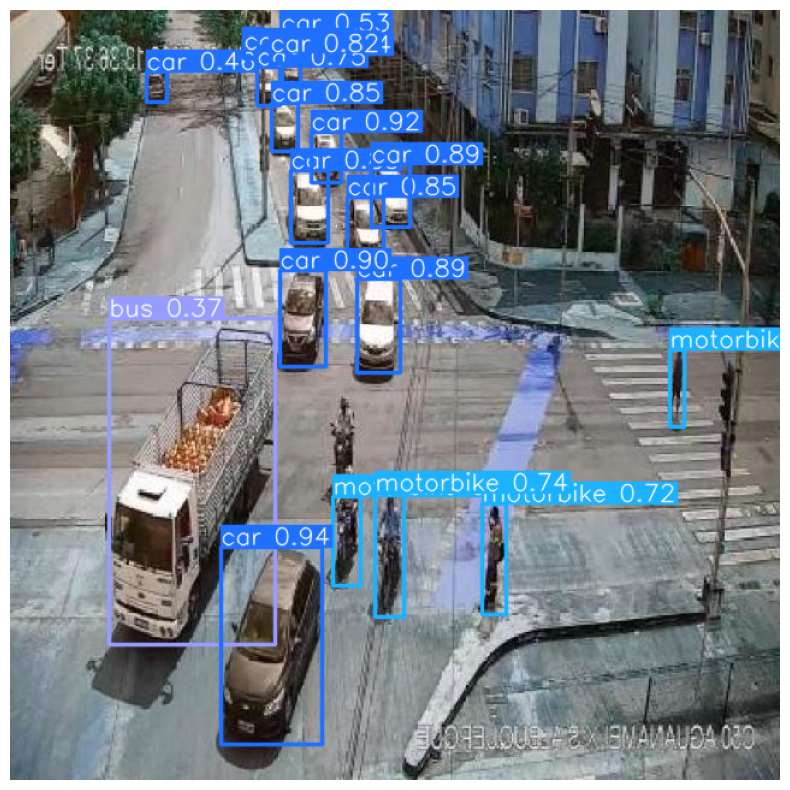

In [24]:
image_path = 'data/test/images/aguanambi-3125_png_jpg.rf.c928762f63b976739588cd27f57fcede.jpg'

# Perform prediction
results = model(image_path)

# Convert the original image from BGR to RGB
img_bgr = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Plot the original image with predictions
plt.figure(figsize=(10, 10))
plt.imshow(results[0].plot())
plt.axis('off')
plt.show()

In [28]:
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.2.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 136.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 23.0s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 24.2s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (24.3s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=/content/data/data.yaml  
Visuali

In [ ]:
!cp -r /content/runs/train /content/drive/MyDrive/Colab/data/yolo-runs/train
!cp -r /content/runs/eval /content/drive/MyDrive/Colab/data/yolo-runs/eval

In [29]:
path

'runs/detect/train/weights/best.onnx'